In [1]:
#All libraries that will be used thorughout this project
import pandas as pd
import numpy as np
import seaborn as sbs
import datetime
import matplotlib.pyplot as plt
from dateutil import parser
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
# Import Data that will be used for analysis

#Shiba data
shiba_df = pd.read_csv("D:\Portfolio Projects\Python Stock Analysis\Coins Data\SHIB-USD.csv")

#Doge data
doge_df = pd.read_csv("D:\Portfolio Projects\Python Stock Analysis\Coins Data\DOGE-USD.csv")

In [3]:
# After examination a minimum amount of data cleaning was needed.

#Shiba - Need to drop lines with $0 dlls value on 'Adj Close' and NaNs 
shiba_df = shiba_df[shiba_df.Close != 0]
shiba_df = shiba_df.dropna()
shiba_df = shiba_df.reset_index(drop = True)

#Doge - Need to drop lines with NaNs
doge_df = doge_df.dropna()
doge_df = doge_df.reset_index(drop = True)

In [4]:
# For this Analysis we will be focusing on 'Adj Close' along with the Dates

#Creating a variable for the Adj Close Amount for each Coin
shiba_close = shiba_df[['Date','Adj Close']]

doge_close = doge_df[['Date','Adj Close']]


In [5]:
# Here we will be leaving variables that we will be using throughout the program 
# you can adjust them at will to change the analysis we will be doing

####################################
##Prediction of Days in the Future##
####################################

Future_Prediciton = 5

In [6]:
# The first approach will be to create a linear regresion to predict future prices
# Let's create data frames for this first approach that way we will always have our previous data frames ready to be used in different models

shiba_linear = shiba_close
doge_linear = doge_close




In [7]:
# Lets creat new columns on each data frame and lets call them "Future Prediction"
# on this new column we are going to use shift (and our targeted days to predict)
shiba_linear['Future Prediction'] = shiba_linear[['Adj Close']].shift(-Future_Prediciton)
doge_linear['Future Prediction'] = doge_linear[['Adj Close']].shift(-Future_Prediciton)

C:\Users\mosco\AppData\Local\Temp\ipykernel_18800\4207649664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shiba_linear['Future Prediction'] = shiba_linear[['Adj Close']].shift(-Future_Prediciton)
C:\Users\mosco\AppData\Local\Temp\ipykernel_18800\4207649664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_linear['Future Prediction'] = doge_linear[['Adj Close']].shift(-Future_Prediciton)


In [8]:
# Now we will creat the indepedent (x) data sets for each coin
shiba_x = np.array(shiba_close.drop(['Date','Future Prediction'],1))
doge_x = np.array(doge_close.drop(['Date', 'Future Prediction'],1))

# Next we want to remove from this set the number of days that we want to forecast (this is how we will test the model)
shiba_x = shiba_x[:-Future_Prediciton]
doge_x = doge_x[:-Future_Prediciton]

C:\Users\mosco\AppData\Local\Temp\ipykernel_18800\619071389.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  shiba_x = np.array(shiba_close.drop(['Date','Future Prediction'],1))
C:\Users\mosco\AppData\Local\Temp\ipykernel_18800\619071389.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  doge_x = np.array(doge_close.drop(['Date', 'Future Prediction'],1))


In [9]:
# Now we will create the dependent data frame (y) which will be coming fomr th "Future Prediciton" Column
shiba_y = np.array(shiba_close.drop(['Date','Adj Close'],1))
doge_y = np.array(doge_close.drop(['Date','Adj Close'],1))

# We also want to remove the forecasted days from this set
shiba_y = shiba_y[:-Future_Prediciton]
doge_y = doge_y[:-Future_Prediciton]


C:\Users\mosco\AppData\Local\Temp\ipykernel_18800\816562769.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  shiba_y = np.array(shiba_close.drop(['Date','Adj Close'],1))
C:\Users\mosco\AppData\Local\Temp\ipykernel_18800\816562769.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  doge_y = np.array(doge_close.drop(['Date','Adj Close'],1))


In [10]:
# Here we will set the traning and testing percentages that will be used in our Linear Regresion model

# For Shiba
shiba_x_train, shiba_x_test, shiba_y_train, shiba_y_test = train_test_split(shiba_x, shiba_y, test_size=0.2)

# For Doge
doge_x_train, doge_x_test, doge_y_train, doge_y_test = train_test_split(doge_x, doge_y, test_size=0.2)

In [11]:
# Now we create and train the SVM regressor for each coin

#Shiba
shiba_svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
shiba_svr_rbf.fit(shiba_x_train, np.ravel(shiba_y_train))

#Doge
doge_svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
doge_svr_rbf.fit(doge_x_train, np.ravel(doge_y_train))


SVR(C=1000.0, gamma=0.1)

In [12]:
# Here we will test the confidence level on the previous calculations
# For reference the best number we can get is 1.00

shiba_svm_confidence = shiba_svr_rbf.score(shiba_x_test, shiba_y_test)
print("Shiba confidence is : ", shiba_svm_confidence)

doge_svm_confidence = doge_svr_rbf.score(doge_x_test, doge_y_test)
print("Doge confidence is : ", doge_svm_confidence)

Shiba confidence is :  -1.4992251627910549
Doge confidence is :  0.1597281307845415


### SVM Regressor

From the results above, you can see that both coins are pretty hard to group/label the prices or "learn" from them. 
The negative confidence in Shiba means that the program did not learn anything from the data set.
Even though Doge is considerably low, it demonstrated to be a bit easier to "learn" from the data provided. 

These numbers would be different if they looked at steady numbers like regular stocks. Or any assets that are not as volatile as Cryptocurrency at the moment. SVM seems inefficient in trying to group prices for these two coins.

Nevertheless, we will still try to apply the regression model to both coins.



In [13]:
# Here we will create the Liner Regresion for Shiba Inu

shiba_lr = LinearRegression()

# Now we will trian the model 

shiba_lr.fit(shiba_x_train, shiba_y_train)

# Now we will test the confidence score
shiba_lr_confidence = shiba_lr.score(shiba_x_test, shiba_y_test)
print("Shiba Confidence Score is : ", shiba_lr_confidence)


Shiba Confidence Score is :  0.8355896081585652


In [14]:
# Here we will create the Liner Regresion for Doge

doge_lr = LinearRegression()

# Now we will trian the model 

doge_lr.fit(doge_x_train, doge_y_train)

# Now we will test the confidence score
doge_lr_confidence = doge_lr.score(doge_x_test, doge_y_test)
print("Doge Confidence Score is : ", doge_lr_confidence)

Doge Confidence Score is :  0.9388865307622964


### Linear Regression

It looks like Linear Regression will be our best bet to analyze these coins.

Let's go ahead and try to predict future prices for each coin using linear regression

In [15]:
# Here we are only going to keep the amount of days we want to predict focusing on Adj Close Price

#Shiba
shiba_forecast = np.array(shiba_close.drop(['Date', 'Future Prediction'],1))[-Future_Prediciton:]

#Doge
doge_forecast = np.array(doge_close.drop(['Date','Future Prediction'],1))[-Future_Prediciton:]

C:\Users\mosco\AppData\Local\Temp\ipykernel_18800\928744438.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  shiba_forecast = np.array(shiba_close.drop(['Date', 'Future Prediction'],1))[-Future_Prediciton:]
C:\Users\mosco\AppData\Local\Temp\ipykernel_18800\928744438.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  doge_forecast = np.array(doge_close.drop(['Date','Future Prediction'],1))[-Future_Prediciton:]


In [16]:
# Finally let's look at the predictions for future prices

#Shiba
shiba_prediciton = shiba_lr.predict(shiba_forecast)

np.set_printoptions(formatter={'float_kind':'{:f}'.format})
print(shiba_prediciton)

[[0.000026]
 [0.000026]
 [0.000027]
 [0.000026]
 [0.000026]]


In [17]:
#Doge

doge_prediction = doge_lr.predict(doge_forecast)

print(doge_prediction)

[[0.134670]
 [0.138006]
 [0.135709]
 [0.142918]
 [0.144962]]


#### Cleaning before plotting
Before plotting for visualization of the data we need to convert our numpy arrays back to a dataframe so we can add future dates and for them to be related to the prices

In [18]:
# Here we transform np array to a dataframe adding a column called "Price Prediction"
shiba_np_to_df = pd.DataFrame(shiba_prediciton, columns = ['Price Prediction'])
doge_np_to_df = pd.DataFrame(doge_prediction, columns = ['Price Prediction'])
#Then we are going to add a column that will take the last date of the original dataframe + the amount of days we want to predict
shiba_np_to_df["Date"] = ''
doge_np_to_df["Date"] = ''
print(doge_np_to_df)

   Price Prediction Date
0          0.134670     
1          0.138006     
2          0.135709     
3          0.142918     
4          0.144962     


In [19]:
# Now we will have to populate the Date column using a few fucntions along with a bit of data transfers

#First we will take the last day of the original dataframe and populate the first row in our new dataframe like so:
shiba_np_to_df['Date'].iloc[0] = shiba_close['Date'].iloc[-1]
doge_np_to_df['Date'].iloc[0] = doge_close['Date'].iloc[-1]

# The following function is going to take 2 arguments. One is going to be the first day of our dataframe "x_np_to_df"
# The second argument is going to be a floating variable to store the future dates and add them to the dataframe as needed. 

def add_day (x,y):
    date_x = parser.parse(x)

    for i in range(Future_Prediciton):

        date_y = date_x + datetime.timedelta(days= i +1)

        y.append(date_y)
    y = pd.to_datetime(y)


C:\Users\mosco\AppData\Local\Temp\ipykernel_18800\3786277949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shiba_np_to_df['Date'].iloc[0] = shiba_close['Date'].iloc[-1]
C:\Users\mosco\AppData\Local\Temp\ipykernel_18800\3786277949.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_np_to_df['Date'].iloc[0] = doge_close['Date'].iloc[-1]


In [20]:
# Now we will run the function on both of our newly created data frames for each coin

#Shiba
Shib = []
add_day(shiba_np_to_df['Date'].iloc[0],Shib)
    #Here we assing the new "Datetime Index" to the current empty "Date" column
shiba_np_to_df['Date'] = Shib

#Doge
Doge = []
add_day(doge_np_to_df['Date'].iloc[0],Doge)
    #Here we assing the new "Datetime Index" to the current empty "Date" column
doge_np_to_df['Date'] = Doge



In [21]:
# Now let's graph both linear regressions to see which would be the better option to buy today

data_shib = shiba_np_to_df
data_doge = doge_np_to_df

# Just before graphing we need to clean up the dates so they won't be cluttering the data in our graphs.
data_shib['Date'] = data_shib['Date'].dt.strftime('%m-%d')
data_doge['Date'] = data_doge['Date'].dt.strftime('%m-%d')




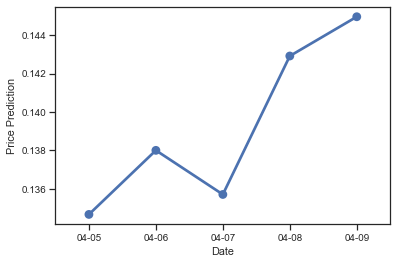

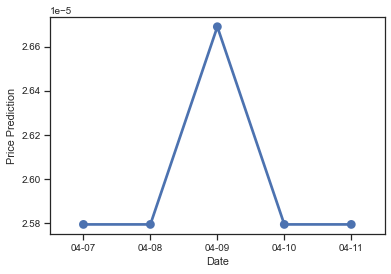

In [22]:
sbs.set(font_scale=0.9, style="ticks")
sbs.pointplot(x='Date', y='Price Prediction', data= data_doge)
plt.show()

sbs.set(font_scale=0.9, style="ticks")
sbs.pointplot(x='Date', y='Price Prediction', data= data_shib)
plt.show()

## Final thoughts 

At this point, comparing both graphs above, I think the safest bet will be Dogecoin. Shiba seems to hold a steady value, but that big spike on 04/09/22 can also indicate a significant price decrease in the future. The upward trend in Dogecoin can somewhat give us a better chance at making a successful "swing trade" jumping in on around 4-5-2022 and making sure to not sell until after 04-08-2022. Cryptocurrency comes with high risk/high volatility. Even though we are applying the correct approach to predict (or closely predict) prices in the future, the nature of this investment will have a chance of deviating completely from our graphs. 